# Installing packages

In [1]:
!pip install -q numpy
!pip install -q pandas
!pip install -q gensim
!pip install -q pynndescent>=0.4
!pip install -q umap-learn
!pip install -q hdbscan
!pip install -q wordcloud
!pip install -q tensorflow
!pip install -q tensorflow_hub
!pip install -q tensorflow_text
!pip install -q torch
!pip install -q sentence_transformers
!pip install -q hnswlib
!pip install -q joblib<1.0.0
!pip install -q wordcloud

     |████████████████████████████████| 81kB 2.6MB/s 
     |████████████████████████████████| 6.4MB 3.5MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 3.4MB 3.8MB/s 
     |████████████████████████████████| 81kB 2.6MB/s 
     |████████████████████████████████| 2.1MB 5.0MB/s 
     |████████████████████████████████| 1.2MB 24.9MB/s 
     |████████████████████████████████| 901kB 36.6MB/s 
     |████████████████████████████████| 3.3MB 35.7MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
/bin/bash: 1.0.0: No such file or directory


In [2]:
!pip install -q top2vec[sentence_transformers]

ERROR: tensorflow 2.4.1 has requirement numpy~=1.19.2, but you'll have numpy 1.20.2 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.


# Import

In [3]:
import numpy as np


In [5]:
import pandas as pd
from copy import deepcopy
from top2vec import Top2Vec

# Load data

In [7]:
df = pd.read_excel('Abstracts1.xlsx')

In [8]:
df.head(3)

Abstract
0  BACKGROUND: In December 2019, COVID-19 broke o...
1  BACKGROUND: The recent coronavirus disease (CO...
2  Hamad General Hospital Anticoagulation Clinic ...

In [9]:
docs= list(df.loc[:, "Abstract"].values)

In [10]:
docs[:5]

['BACKGROUND: In December 2019, COVID-19 broke out in Wuhan, China, leading to national and international disruptions in health care, business, education, transportation, and nearly every aspect of our daily lives. Artificial intelligence (AI) has been leveraged amid the COVID-19 pandemic; however, little is known about its use for supporting public health efforts. OBJECTIVE: This scoping review aims to explore how AI technology is being used during the COVID-19 pandemic, as reported in the literature. Thus, it is the first review that describes and summarizes features of the identified AI techniques and data sets used for their development and validation. METHODS: A scoping review was conducted following the guidelines of PRISMA-ScR (Preferred Reporting Items for Systematic Reviews and Meta-Analyses Extension for Scoping Reviews). We searched the most commonly used electronic databases (eg, MEDLINE, EMBASE, and PsycInfo) between April 10 and 12, 2020. These terms were selected based o

# Top2Vec

In [11]:
model=Top2Vec(docs, embedding_model='universal-sentence-encoder')

2021-05-02 03:09:11,303 - top2vec - INFO - Pre-processing documents for training
2021-05-02 03:09:12,635 - top2vec - INFO - Downloading universal-sentence-encoder model
INFO:absl:Using /tmp/tfhub_modules to cache modules.
INFO:absl:Downloading TF-Hub Module 'https://tfhub.dev/google/universal-sentence-encoder/4'.
INFO:absl:Downloaded https://tfhub.dev/google/universal-sentence-encoder/4, Total size: 987.47MB
INFO:absl:Downloaded TF-Hub Module 'https://tfhub.dev/google/universal-sentence-encoder/4'.
2021-05-02 03:09:35,067 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2021-05-02 03:09:39,662 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2021-05-02 03:10:03,011 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2021-05-02 03:10:03,104 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


In [12]:
model.get_num_topics()

13

In [14]:
topic_words, word_scores,topic_nums = model.get_topics(13)

In [19]:
model.get_topic_sizes()

(array([269, 182, 178, 145, 141, 137, 116, 101,  80,  62,  45,  35,  28]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]))

# Word clouds

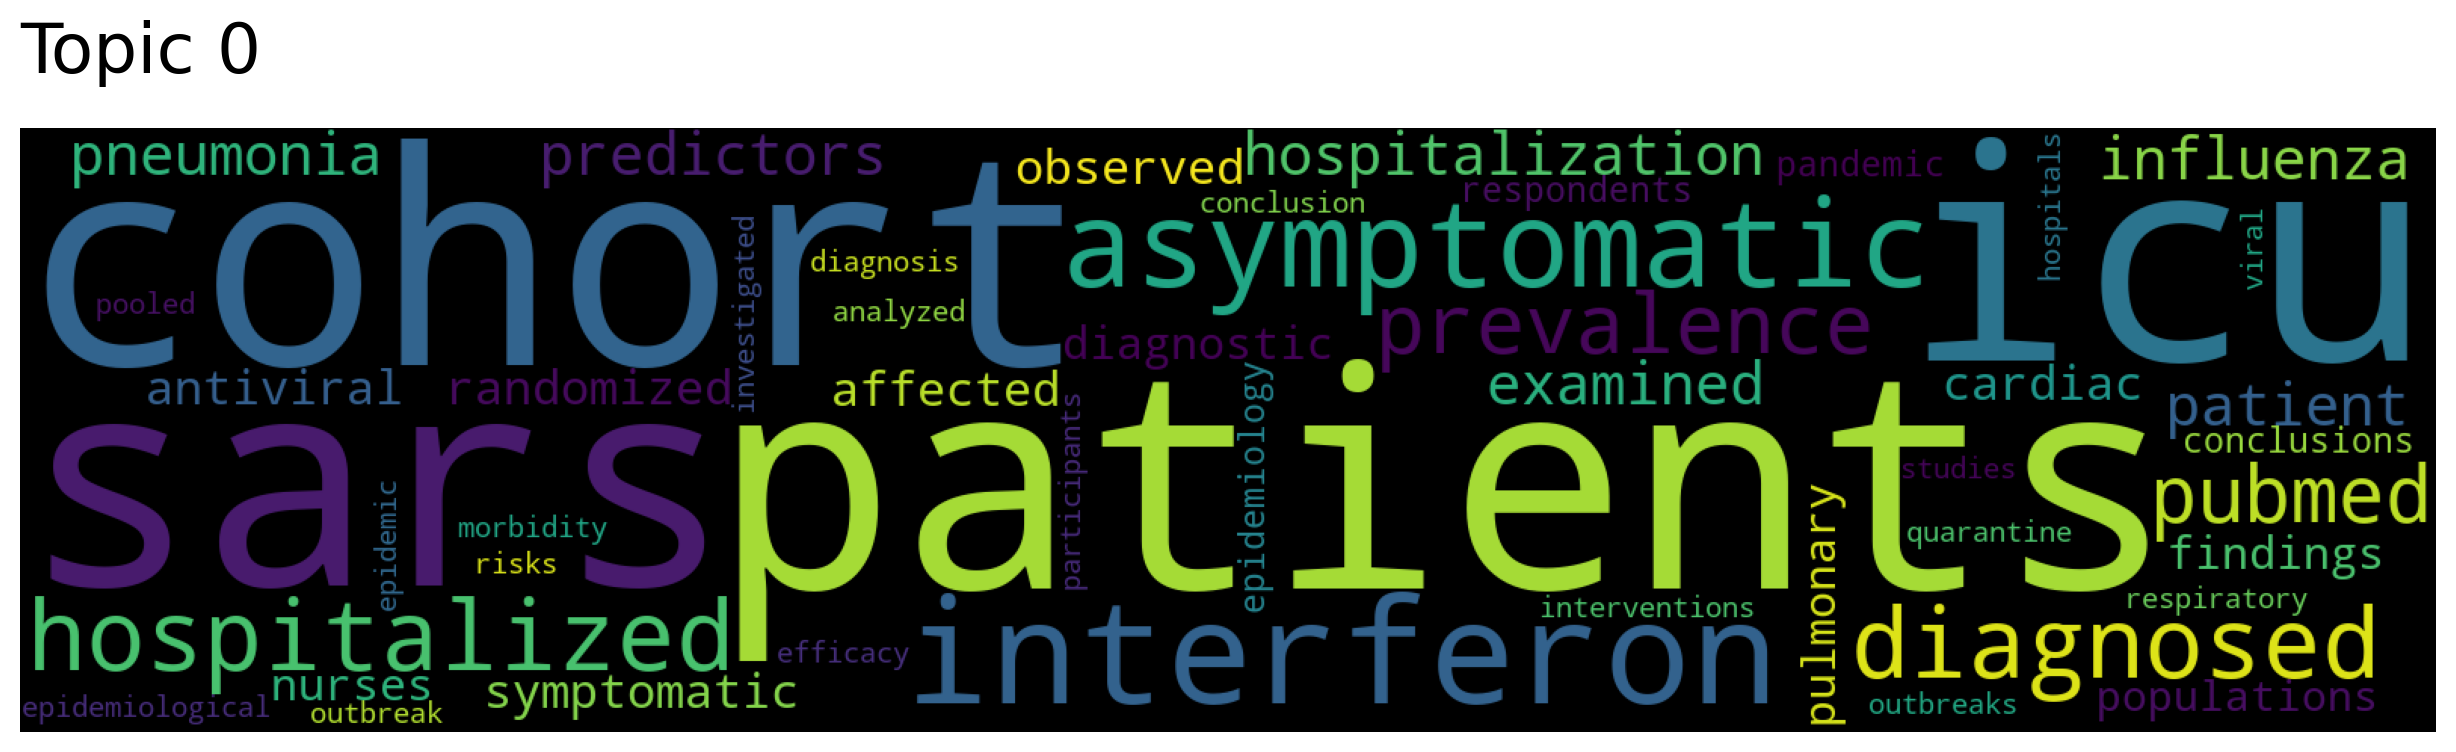

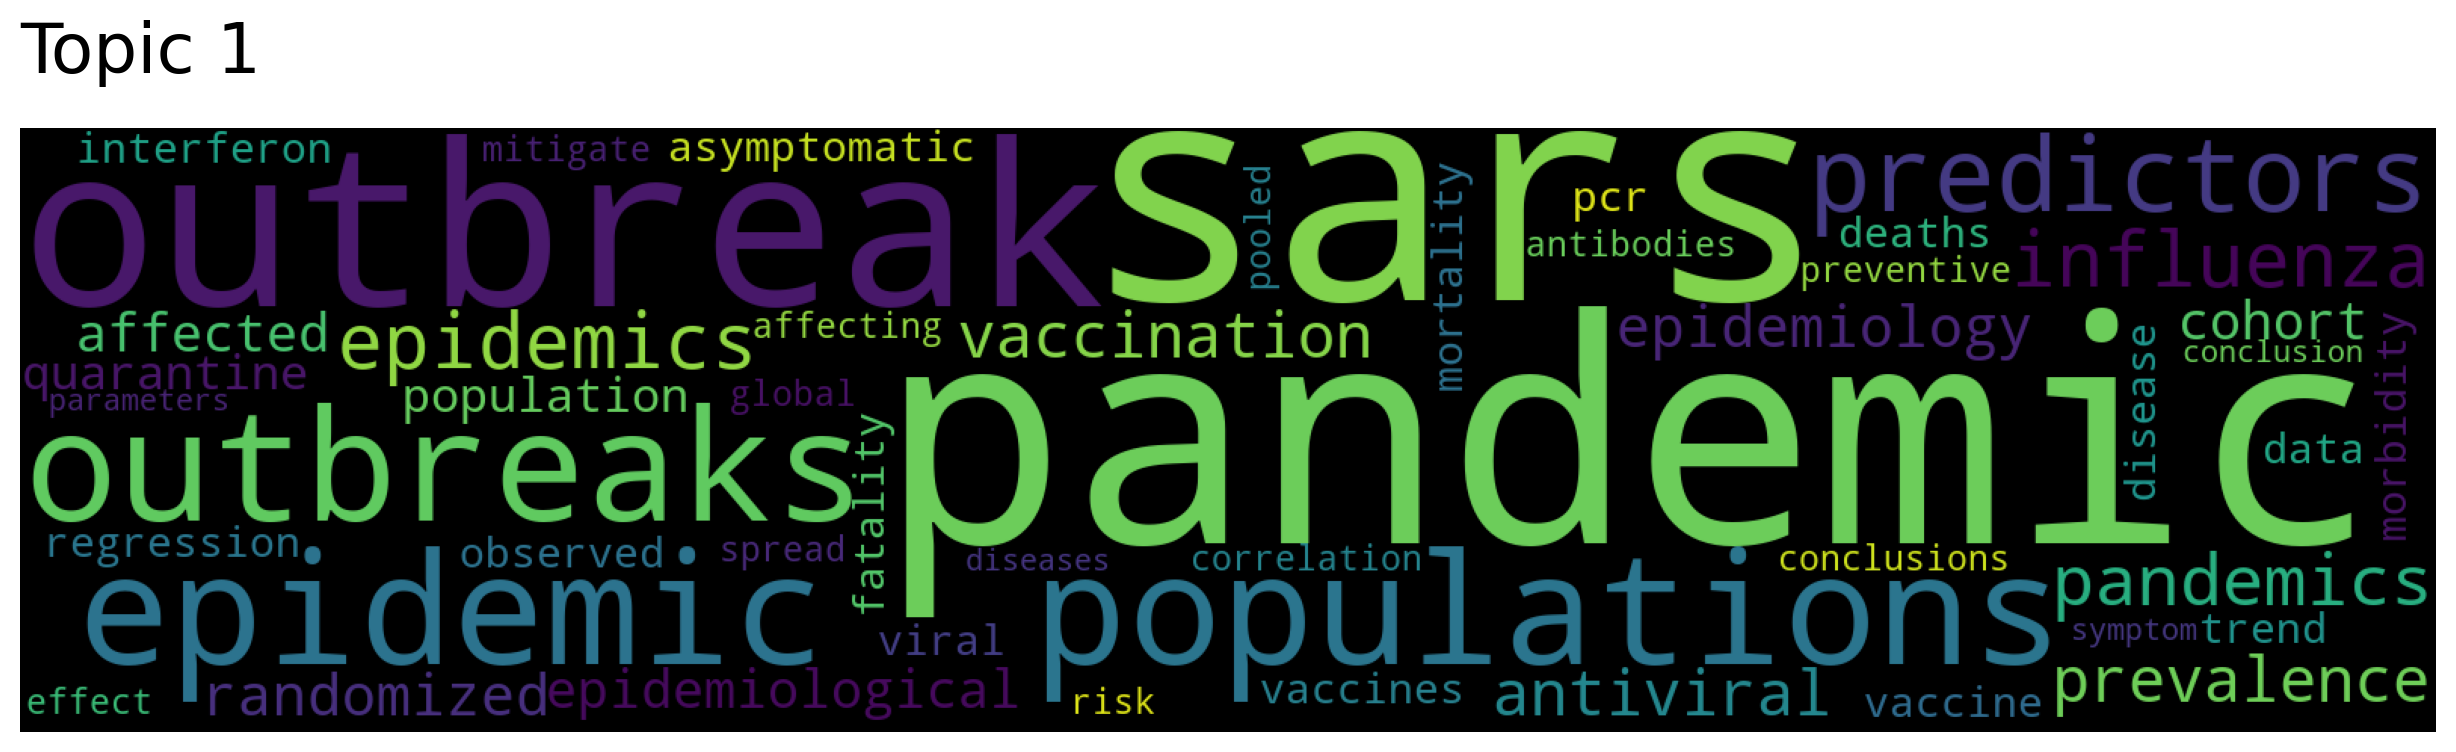

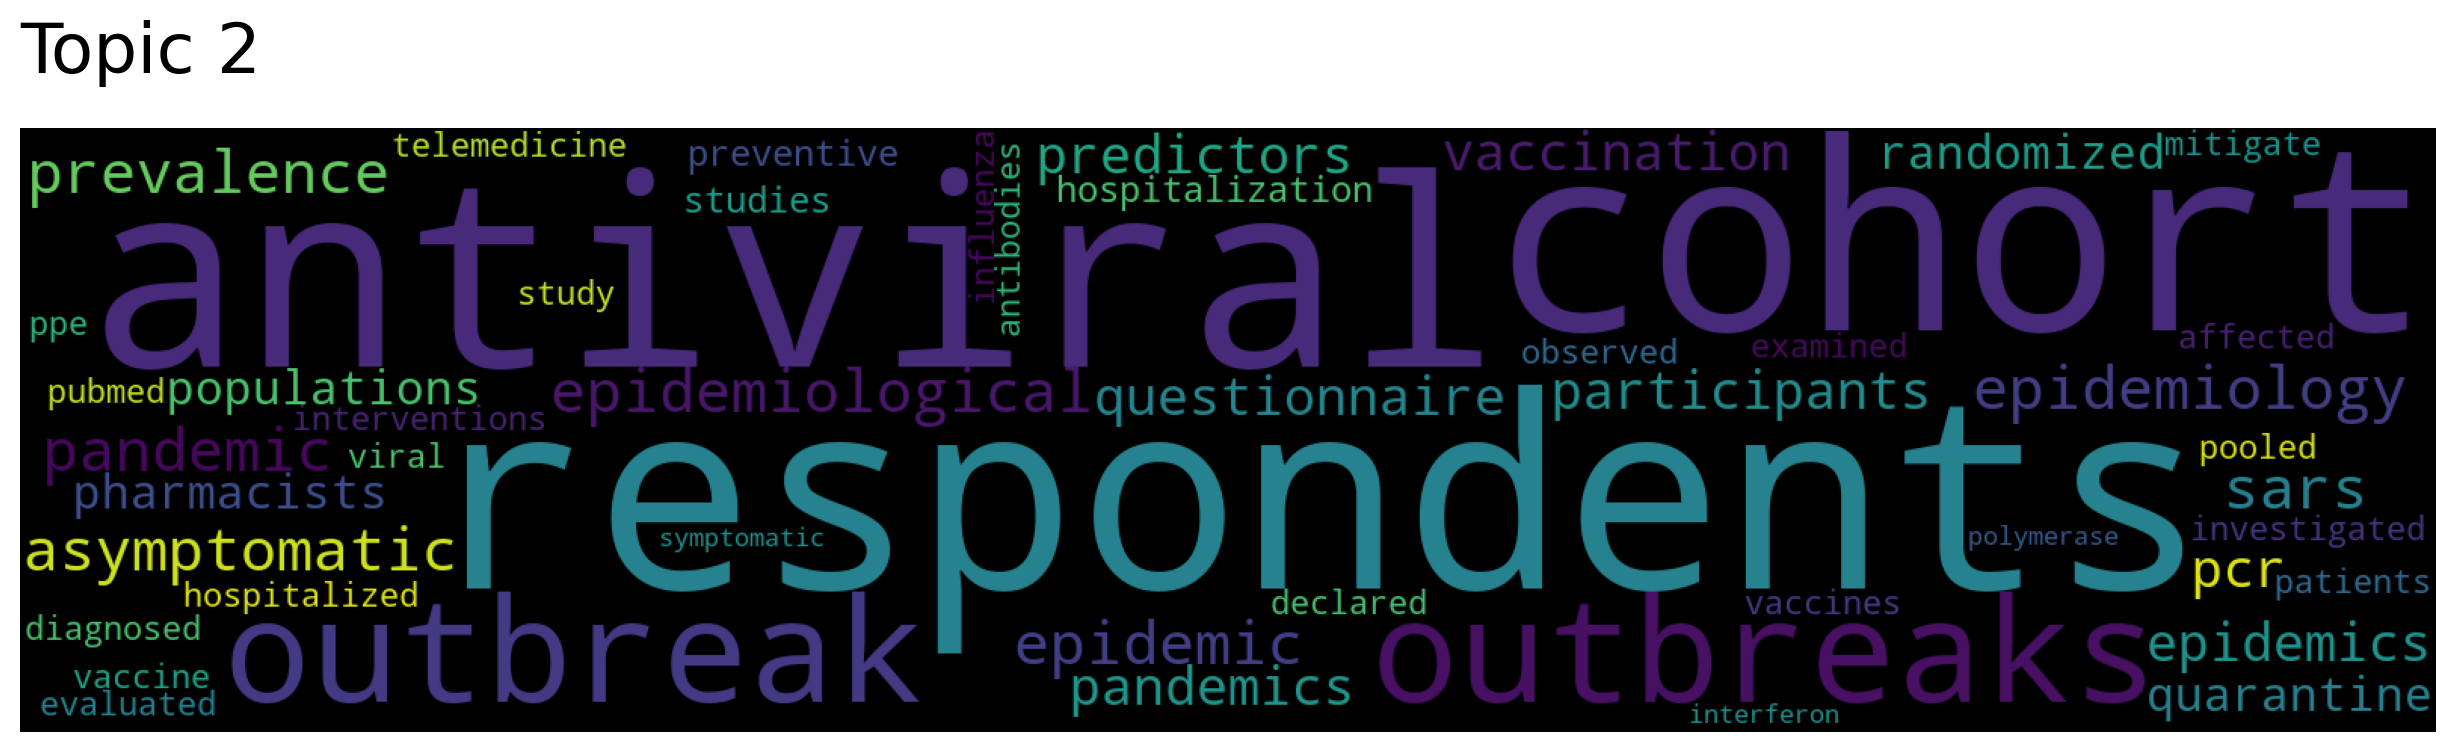

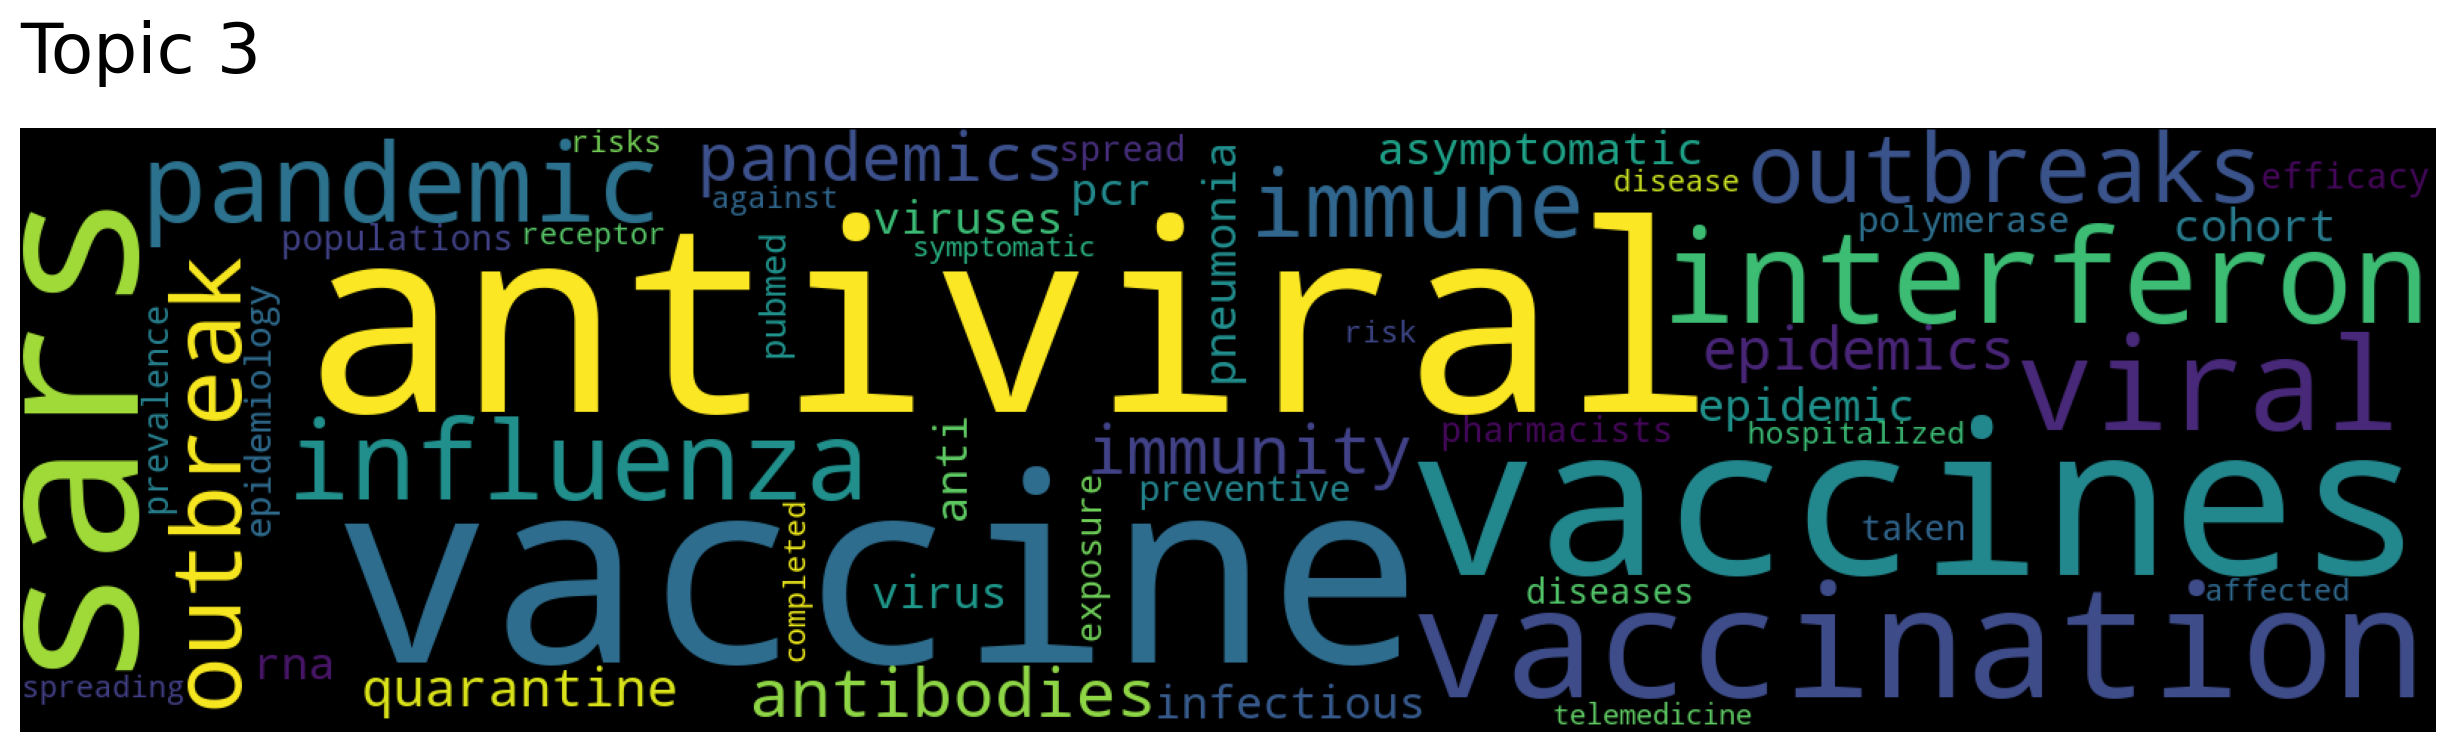

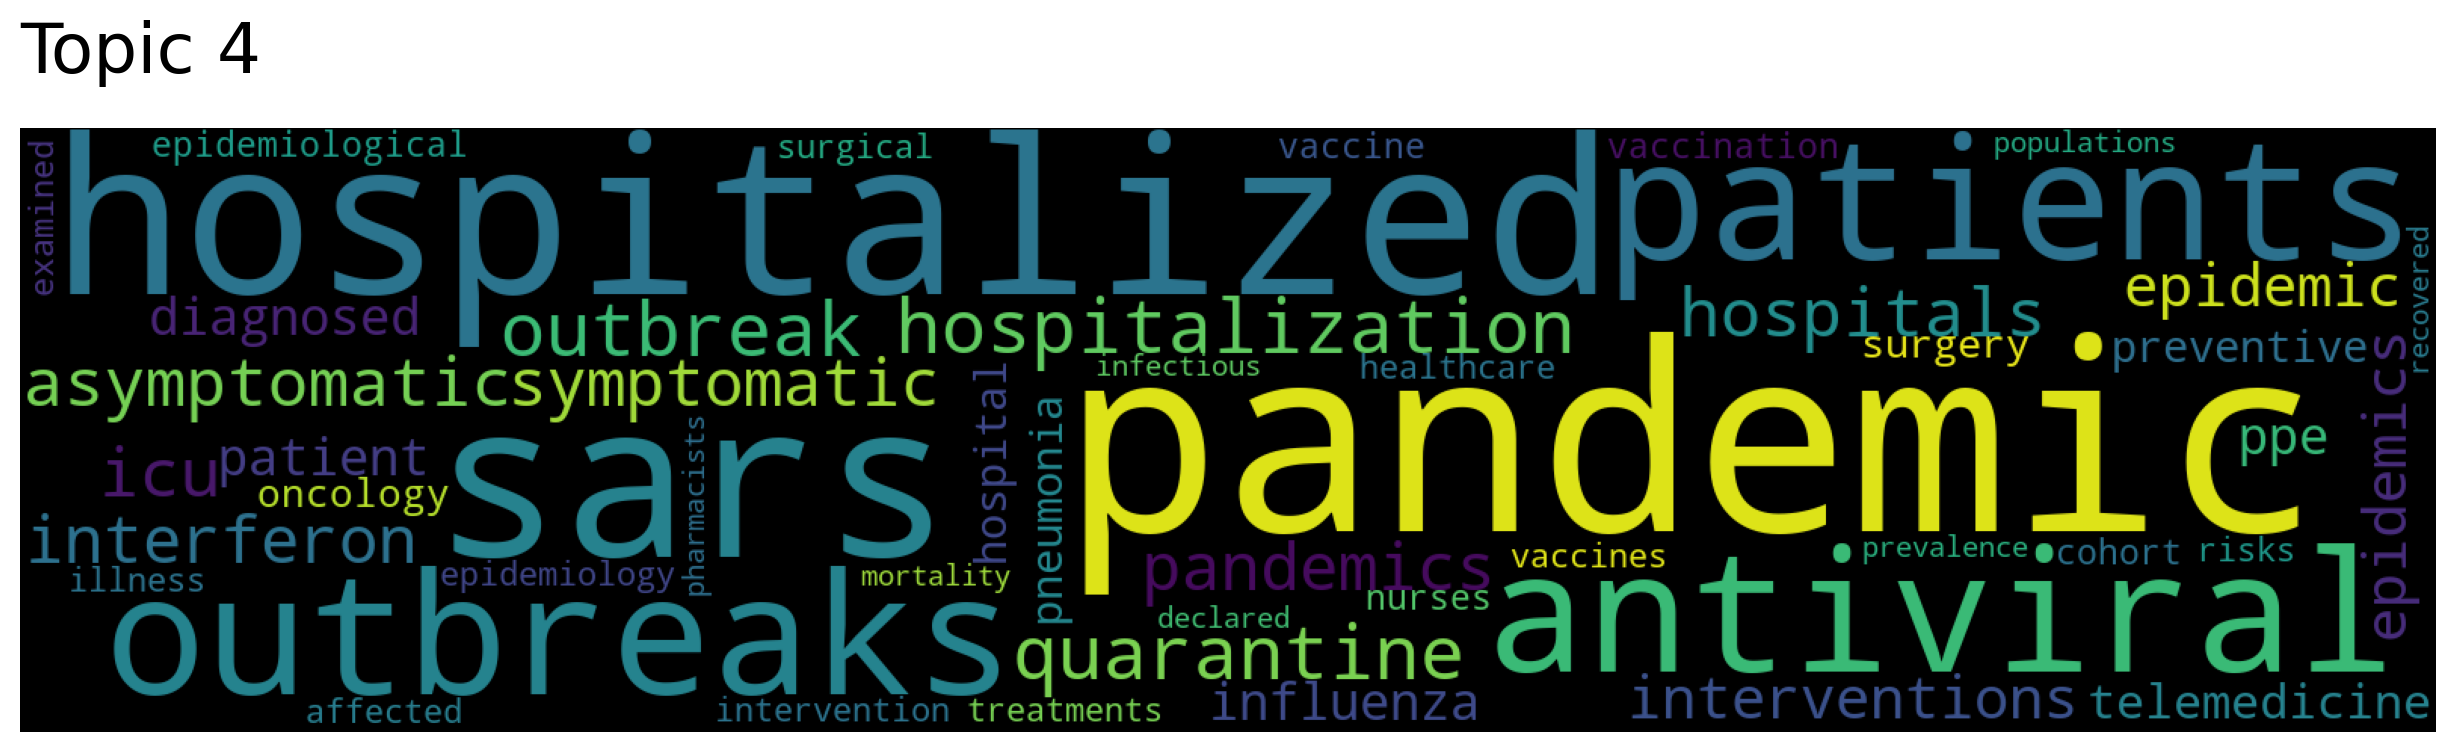

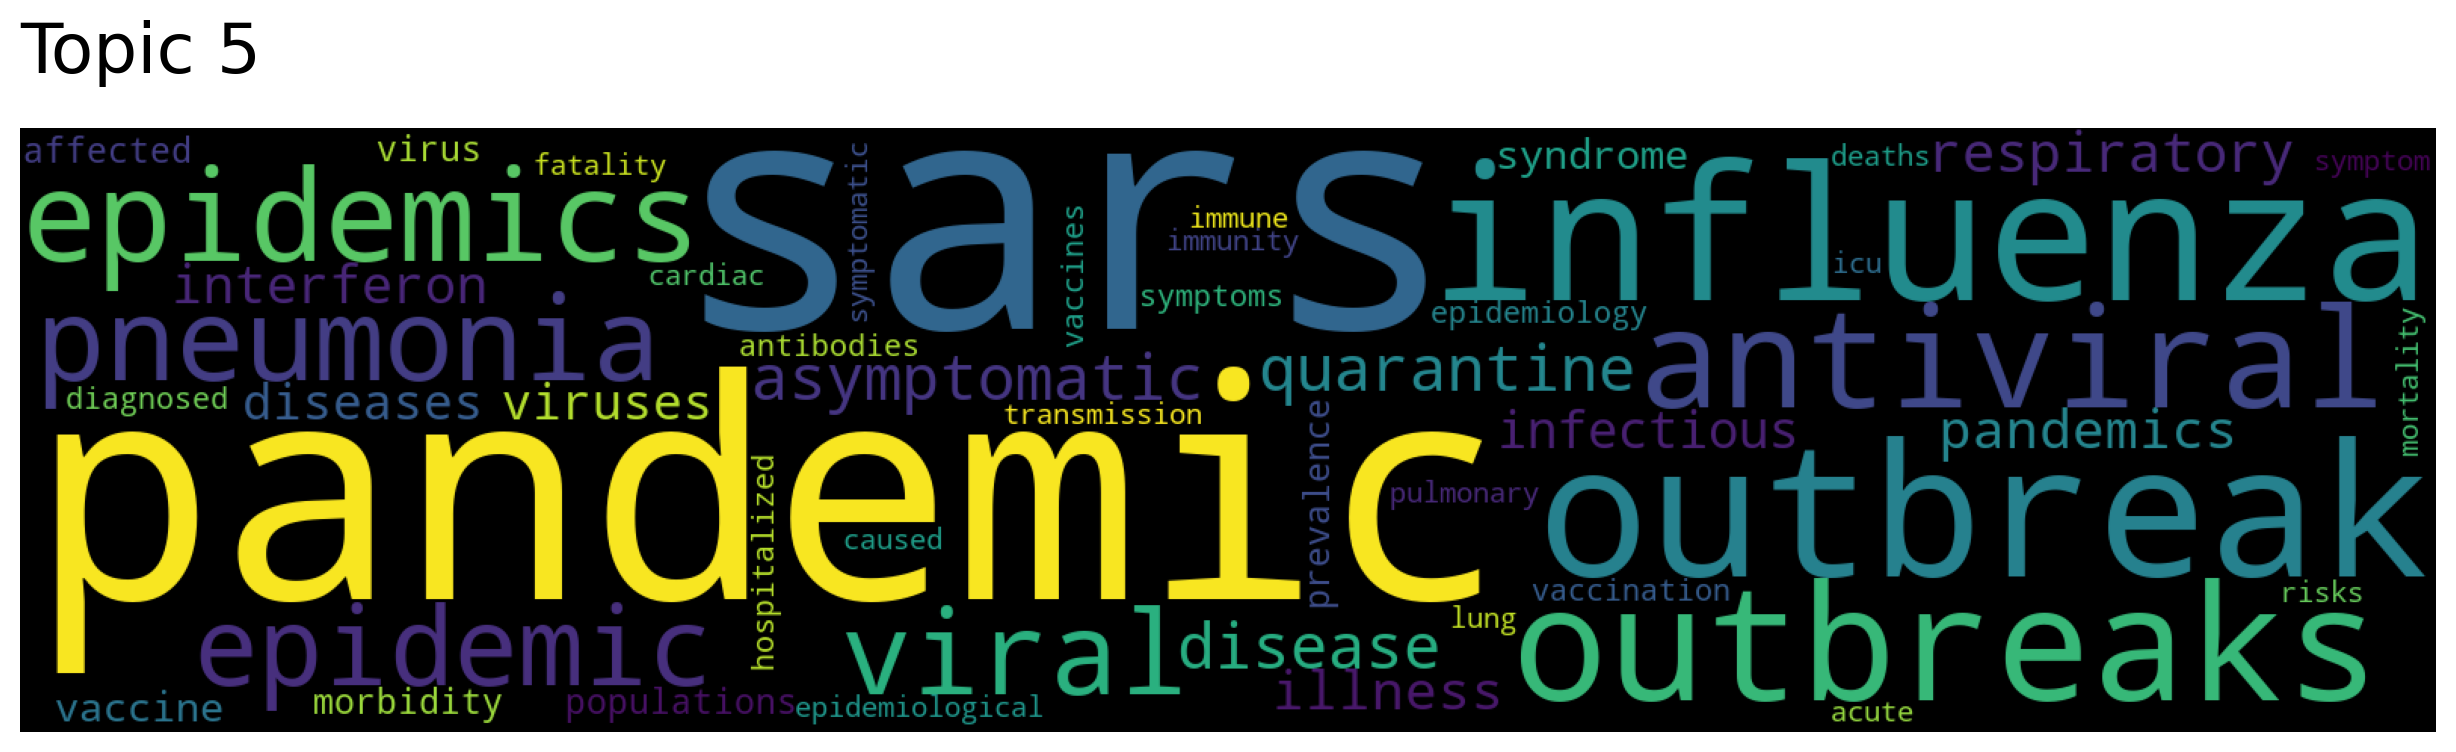

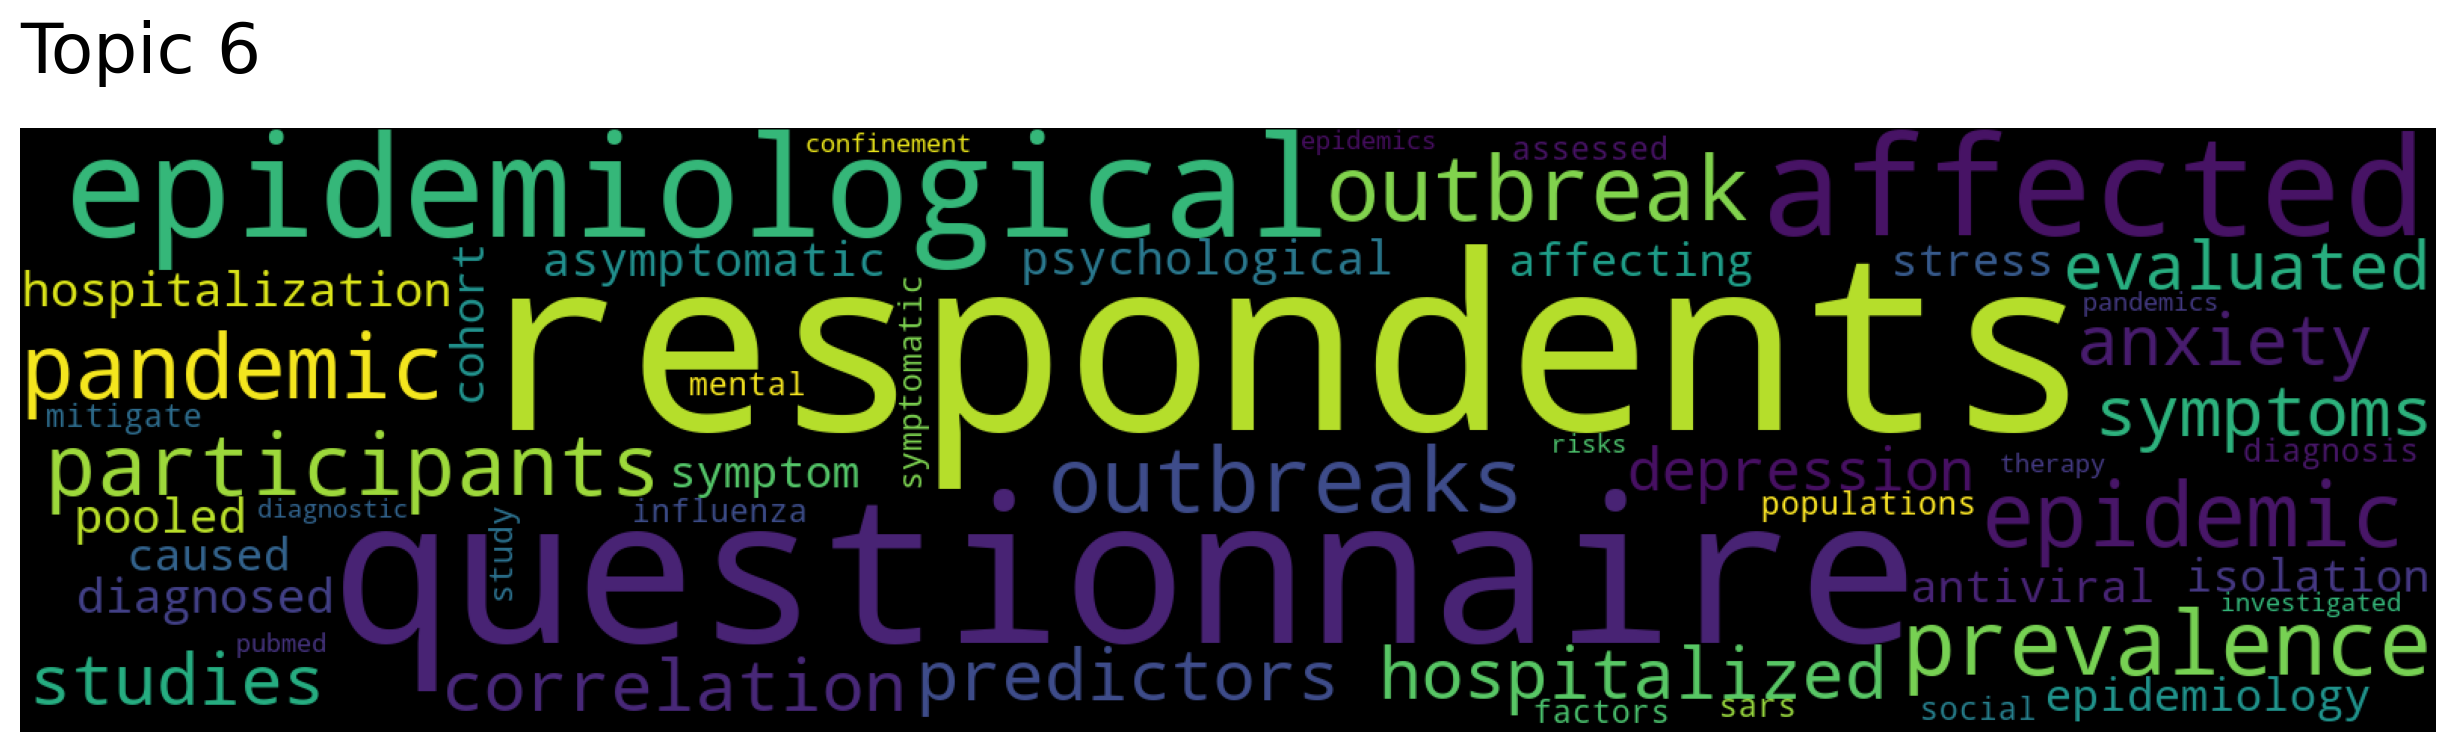

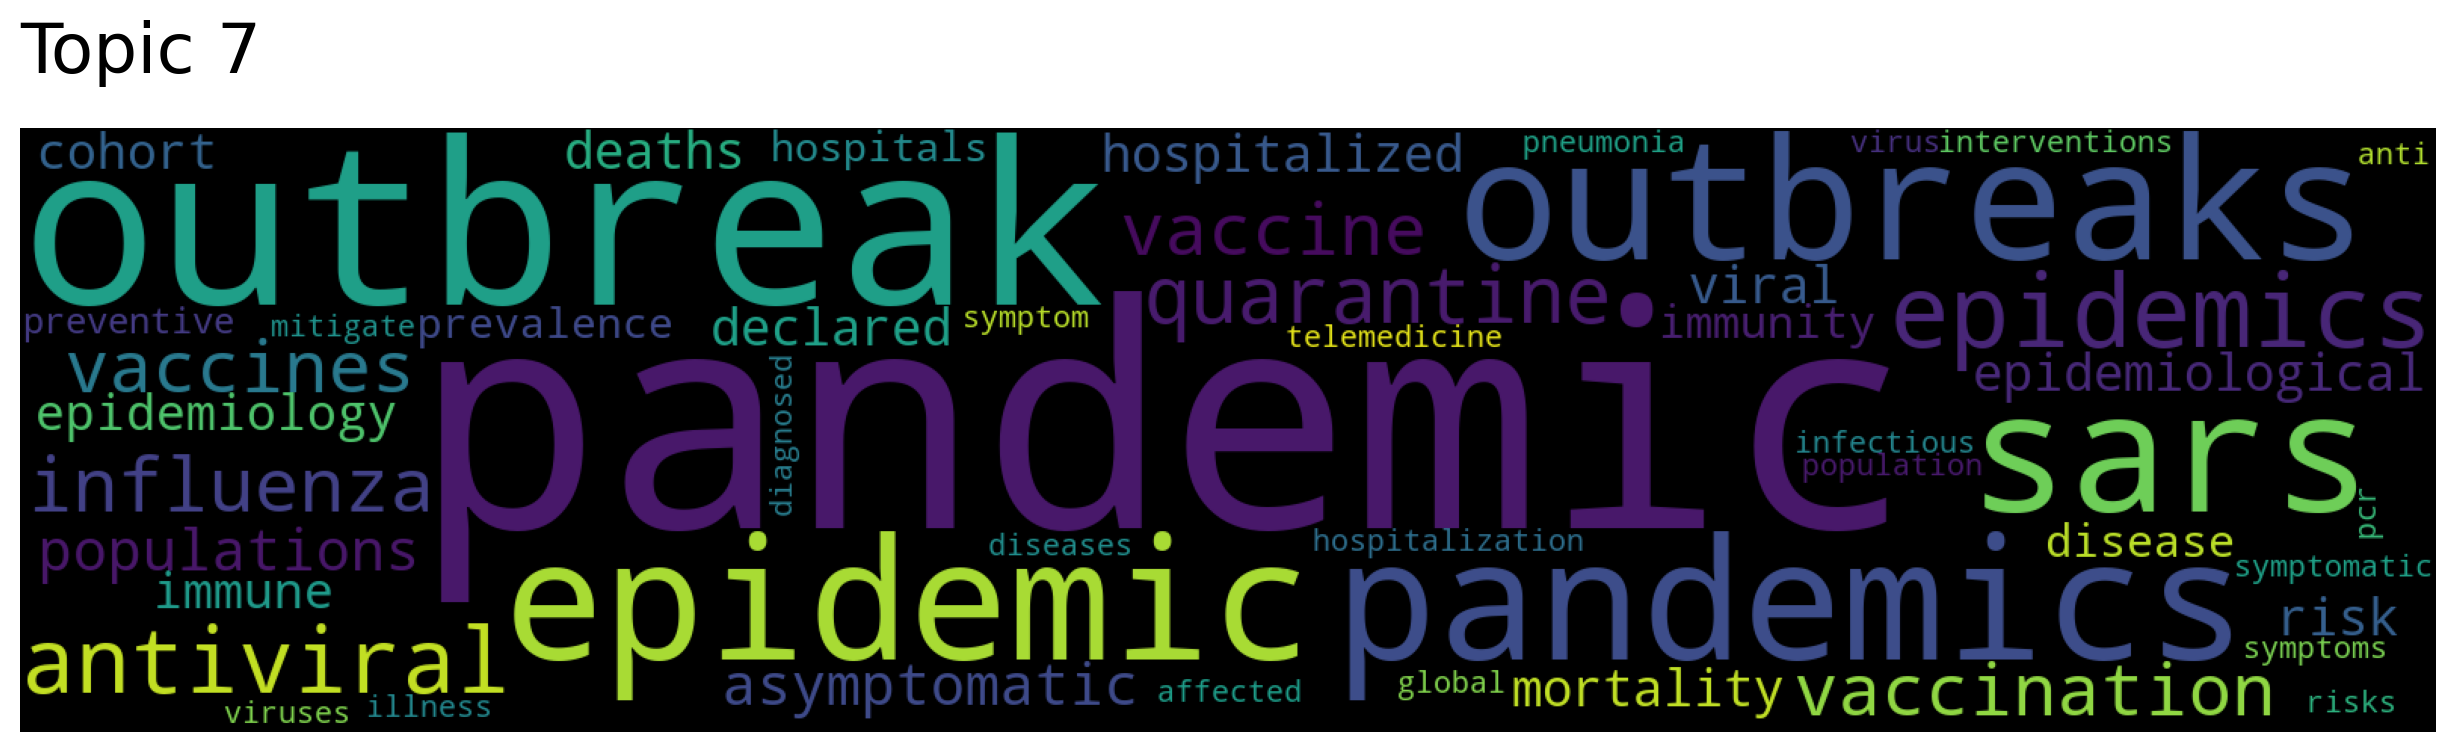

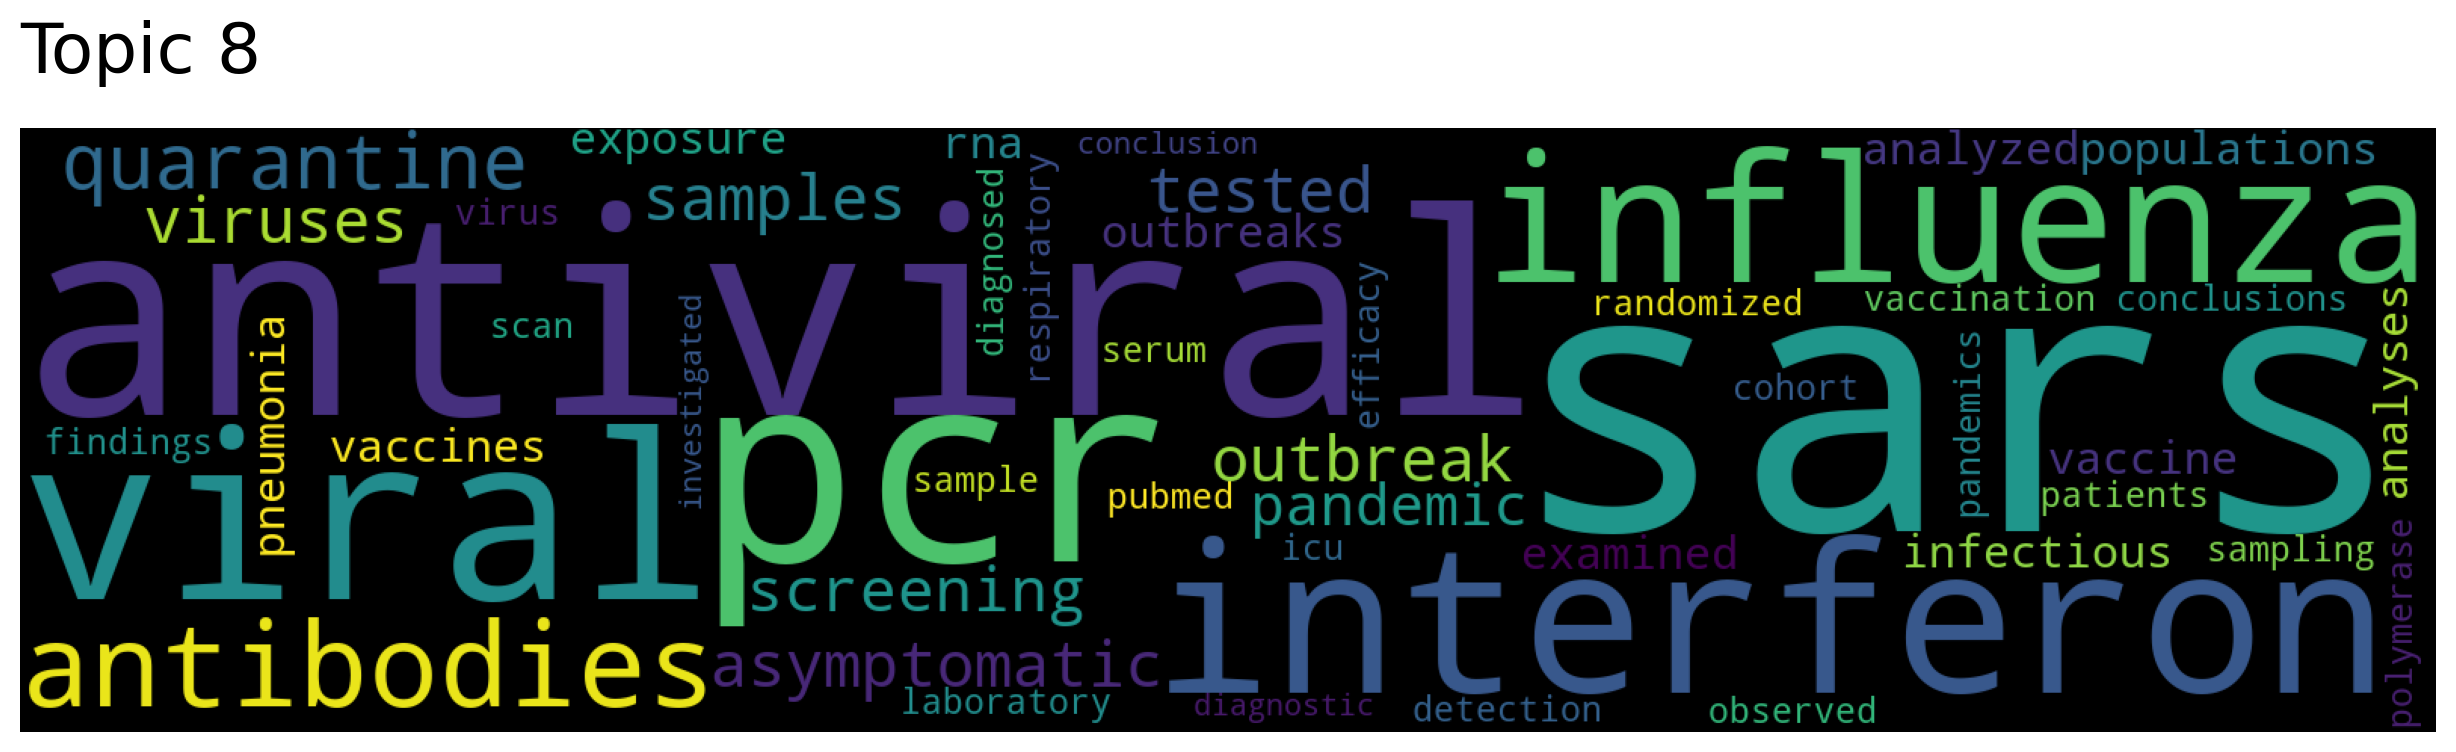

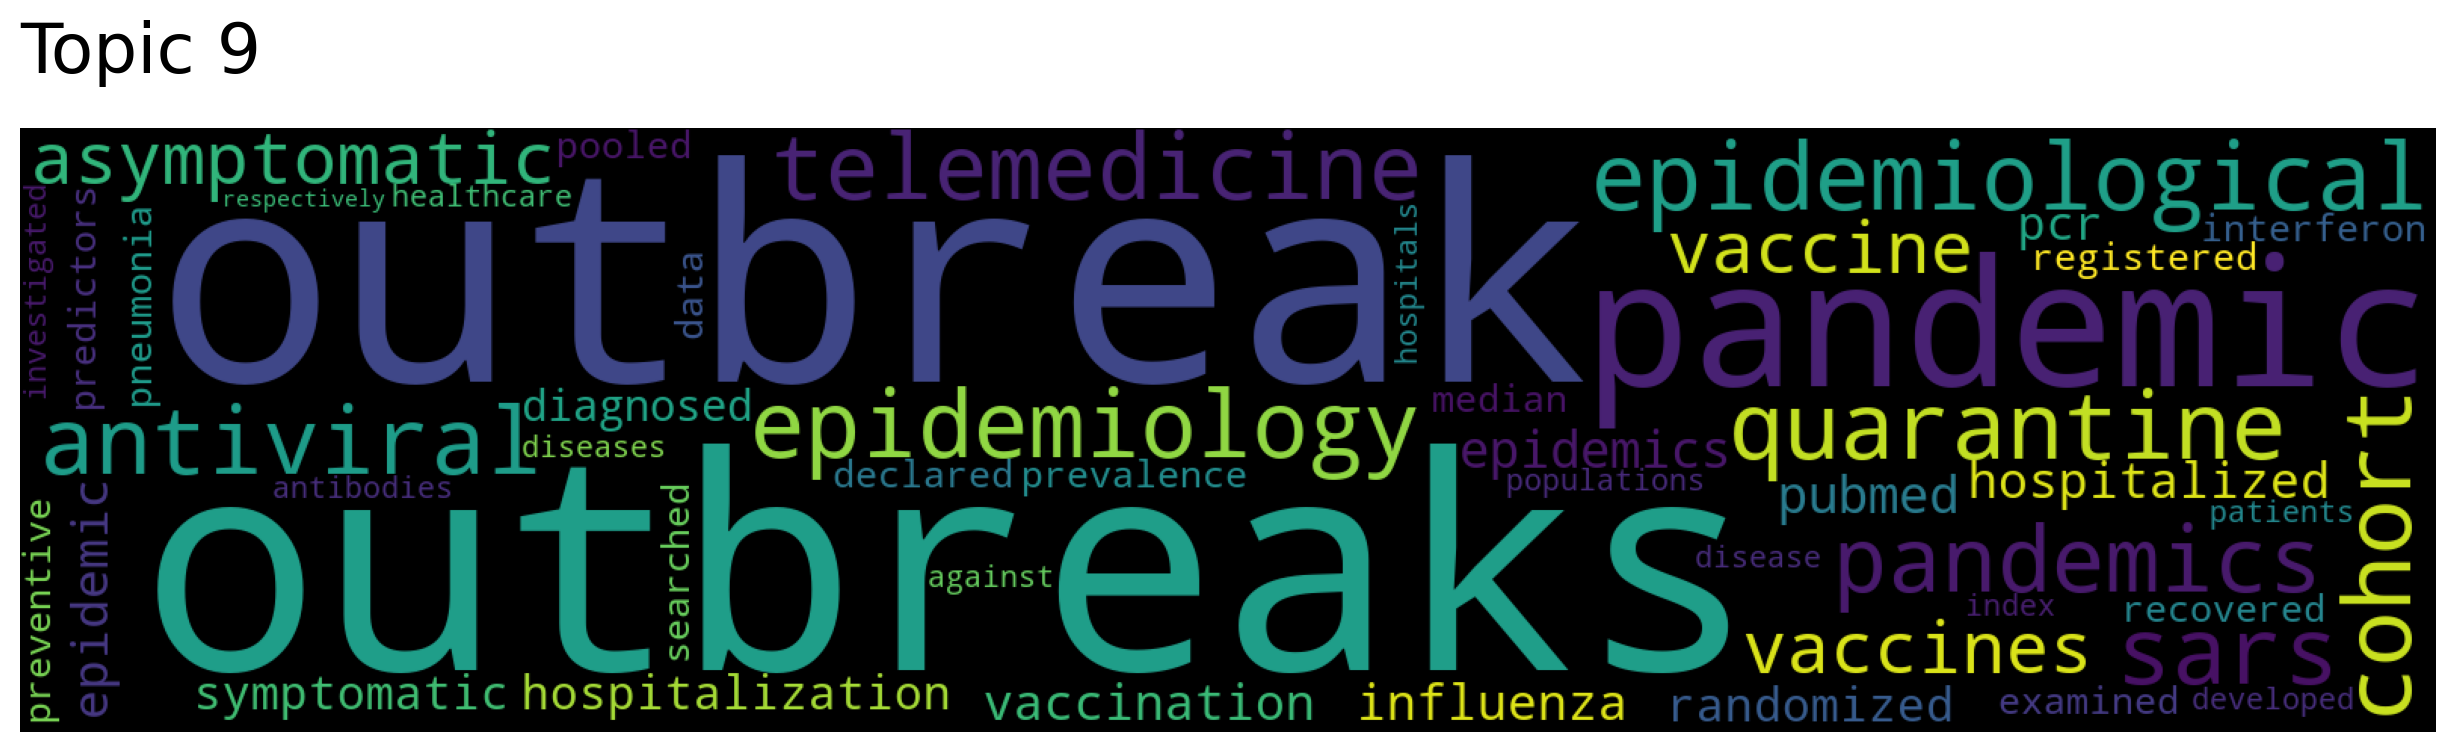

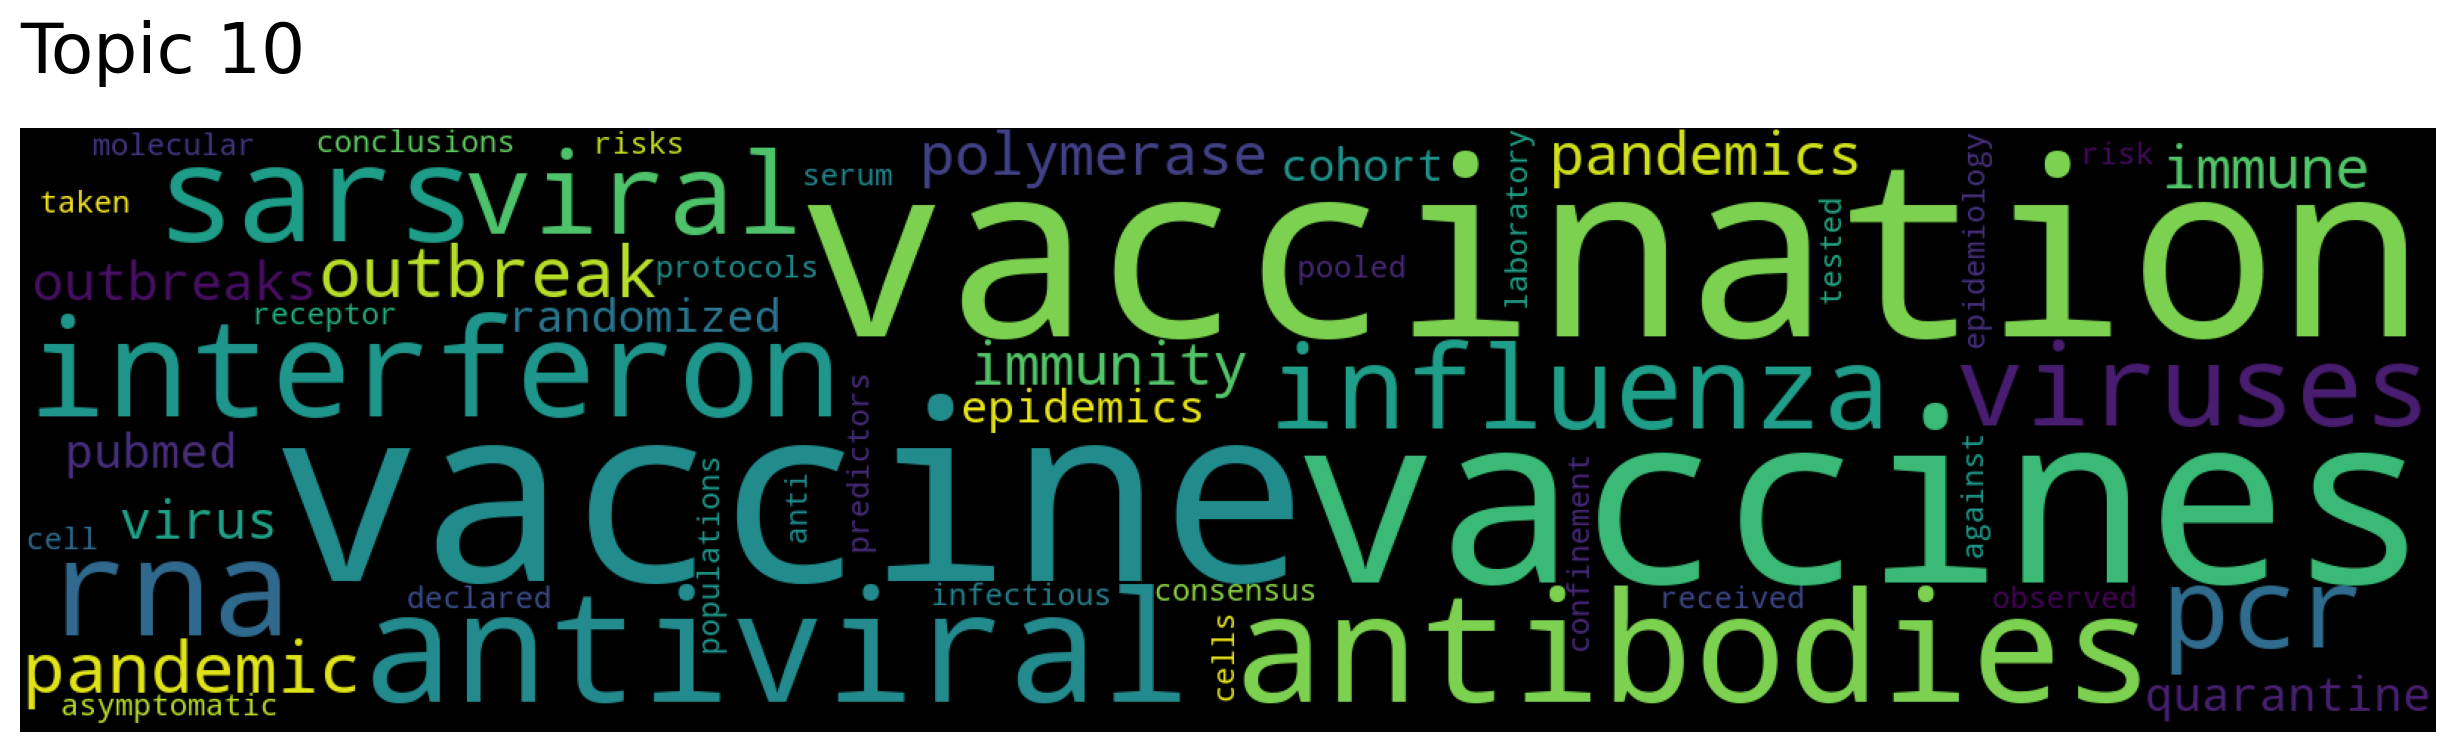

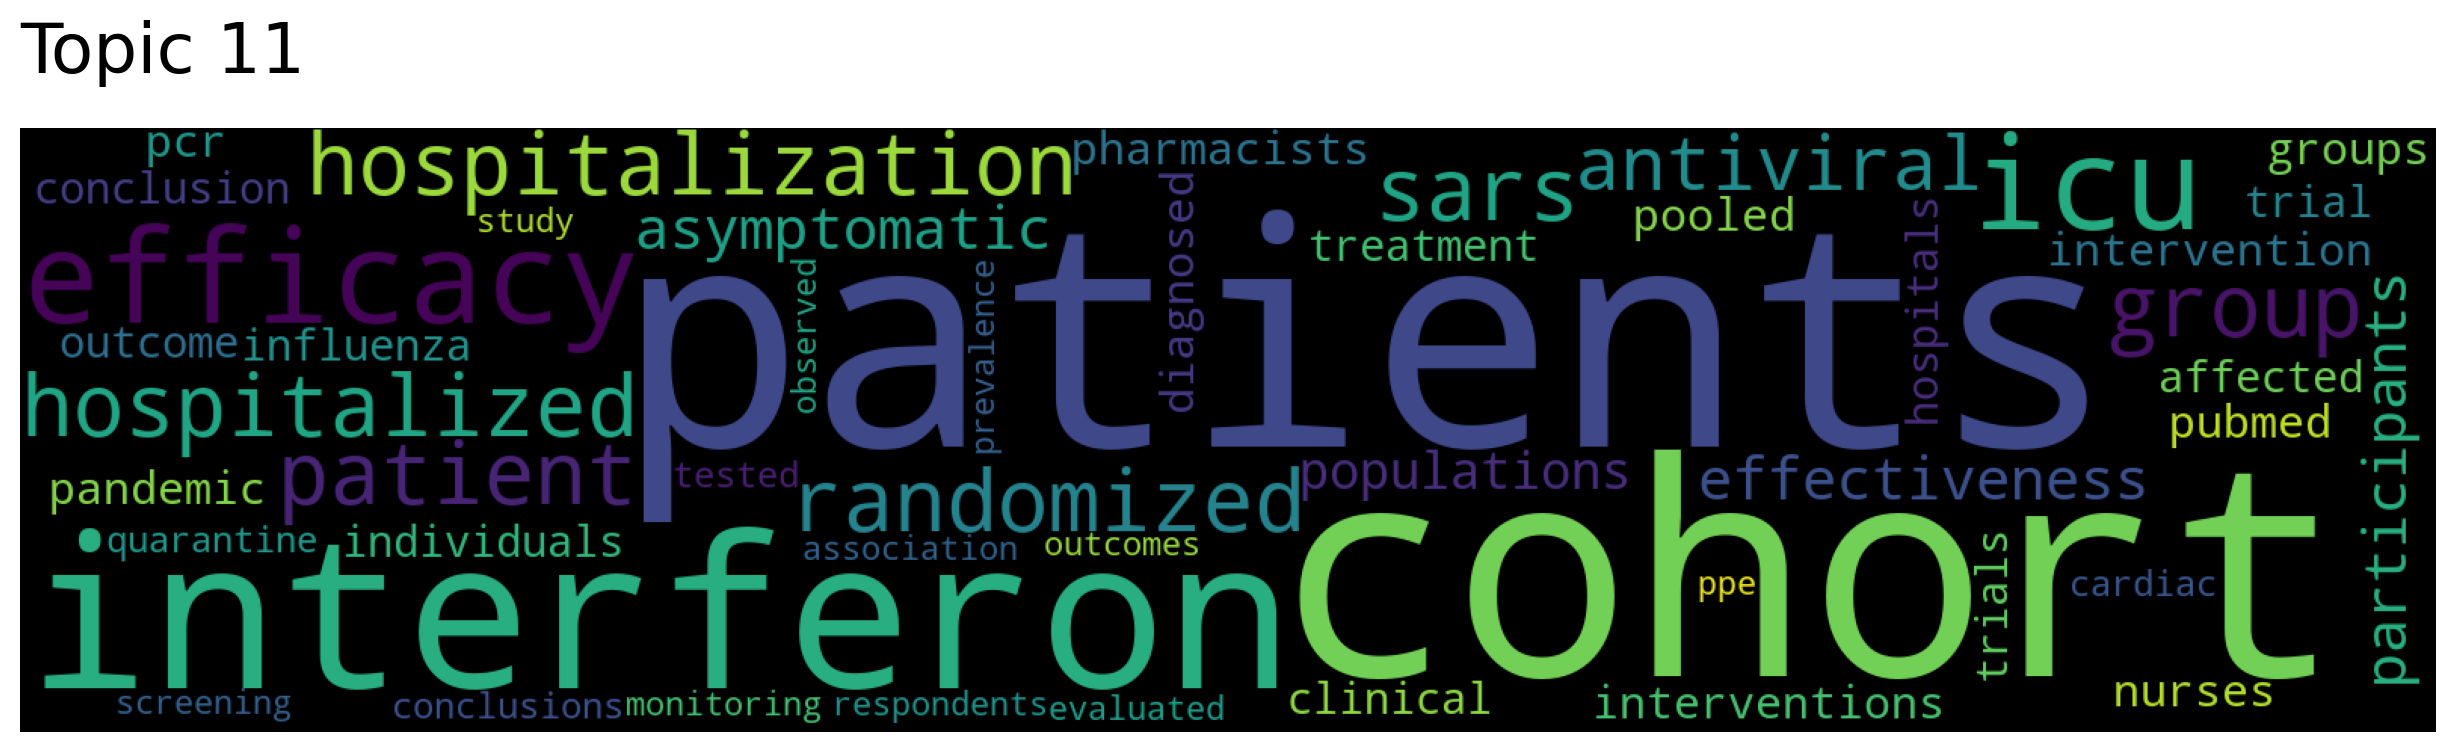

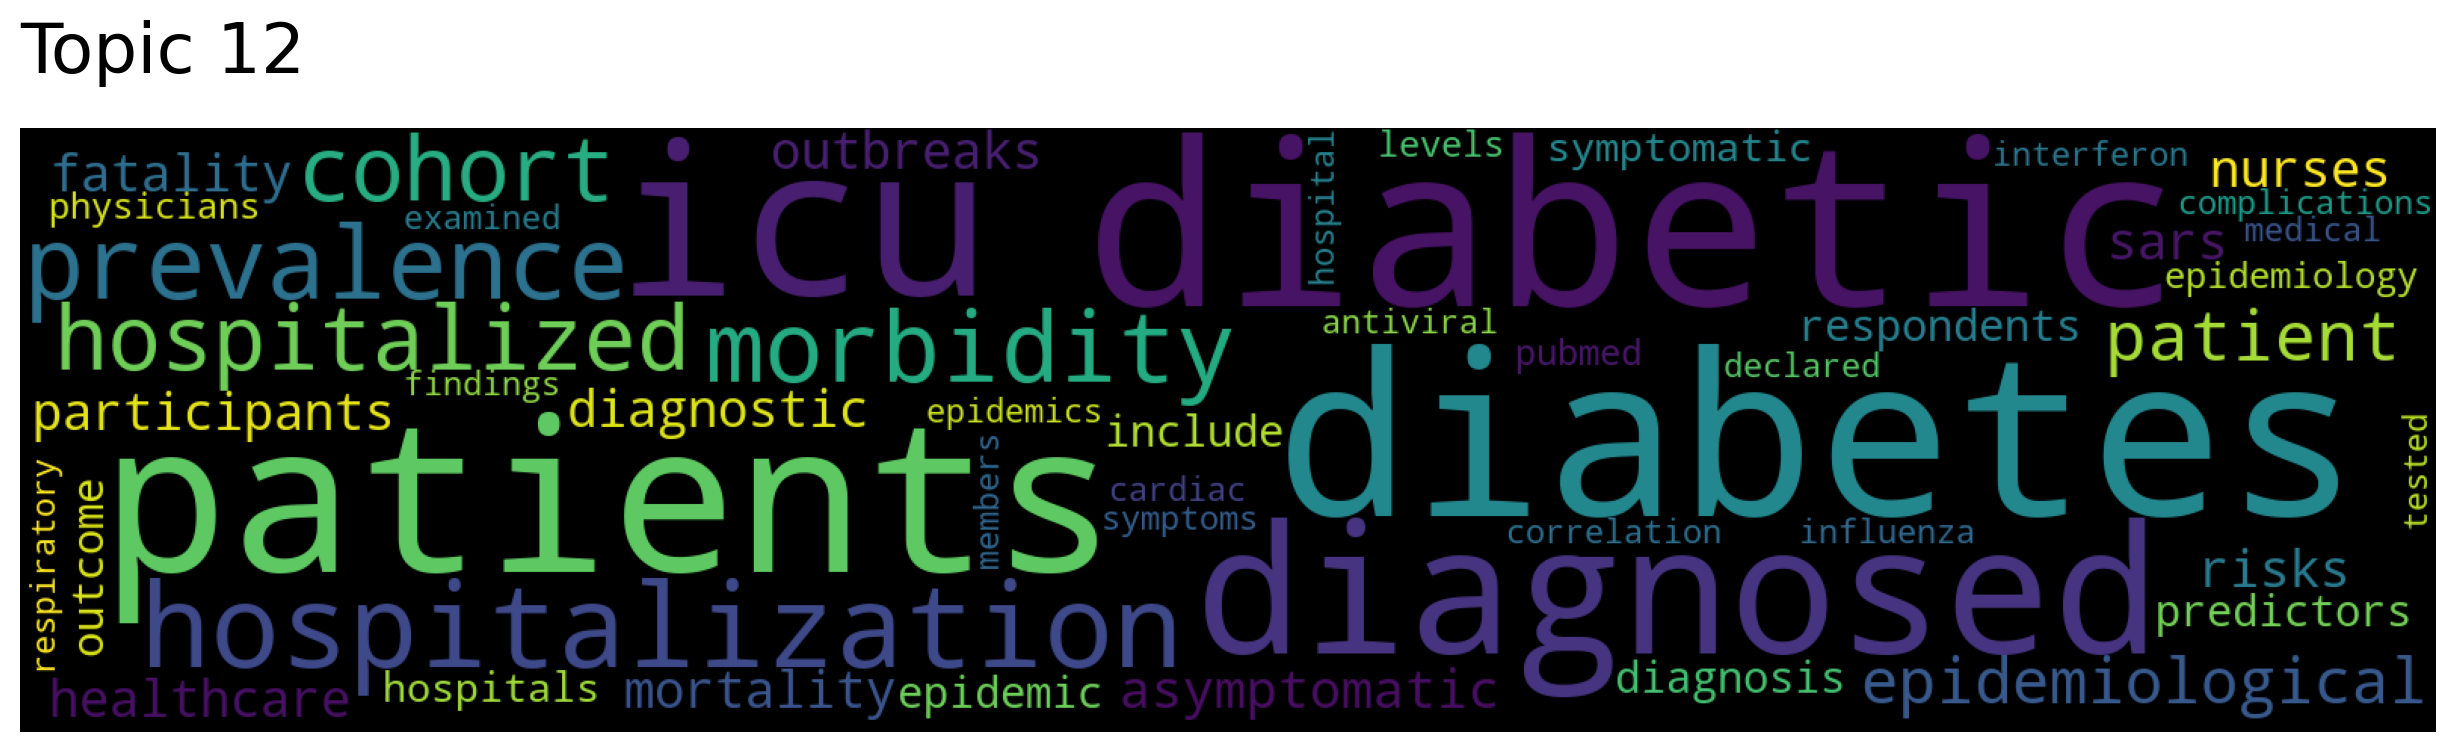

In [15]:
for topic in topic_nums:
  model.generate_topic_wordcloud(topic)

# Finding similar documents in the same theme

In [16]:
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=9, num_docs=2)

In [20]:
documents, document_scores, document_ids = model.search_documents_by_topic(topic_num=9, num_docs=10)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 268, Score: 0.8770805597305298
-----------
BACKGROUND: The novel Coronavirus Disease 2019 is the major public health burden in the world. The disease and death of the global community from corona virus disaes 19 rapidly increasing from time to time worldwide. However, there was a lack of well-organized information about the level of risk, effects, prevention and control methods of the disease. Therefore the aim of this study was to identify and review a published level of risk, effects response to potential health emergencies, prevention, and control methods of Coronavirus Disease 2019 at the global level. METHODS: A systematic review was performed after literatures were identified by searching the following online databases: medRxiv, Google scholar, PubMed, MEDLINE, EMBASE, and the Cochrane Library with supplementary hand searching of conferences. The online databases contain archives of most English biomedical journals. Scientific papers published online by the Center for D

# Similar Keywords

In [21]:
words, word_scores = model.similar_words(keywords=["vaccination"], keywords_neg=[], num_words=10)
for word, score in zip(words, word_scores):
    print(f"{word} {score}")

vaccine 0.844352086314335
vaccines 0.8235411300312416
influenza 0.48835162745074223
pandemics 0.4777439348814032
epidemics 0.46988062026379257
immune 0.4613425969968317
preventive 0.4588502063559059
immunity 0.45567243489388354
viral 0.44251952795000976
disease 0.4302216342317605


# Search papers by keywords

In [24]:
documents, document_scores, document_nums = model.search_documents_by_keywords(keywords=["coronavirus", "respiratory"], num_docs=4)
for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 268, Score: 0.27682979527983387
-----------
During the pandemic caused by the novel coronavirus (COVID-19), lung ultrasound has been used to diagnose and monitor respiratory condition. The aim of the study was to describe lung ultrasound findings in children with a COVID-19 infection. Patients younger than 18 years old and positive for COVID-19, admitted to pediatric tertiary referral hospital were included. They were divided into two groups depending on the presence of respiratory symptoms. Lung ultrasound results were categorized into four degrees according to Soldati et al. score (J Ultrasound Med 39:1-7, 2020) and it was also described the presence and type of consolidation. Sixteen patients were recruited. The median age was 11 years old (IQR 2.8-12). Four children (25%) required admission to the intensive care unit. Six patients (37.5%) presented with respiratory symptoms. Most of them showed S.score of 2 and subpleural consolidations were observed in four cases (66.6%)